In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../datasets/cleaned/cleaned_train.csv")
kaggle_data = pd.read_csv("../datasets/cleaned/cleaned_test.csv")

# Data Analysis

In [3]:
# re-examining new correlations
# correlation has increased overall
df.corr()[["saleprice"]].sort_values(by="saleprice", ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.810537
gr_liv_area,0.694548
year_built,0.633616
year_remod/add,0.587492
1st_flr_sf,0.585682
full_bath,0.552379
fireplaces,0.448829
totrms_abvgrd,0.446278
open_porch_sf,0.393971


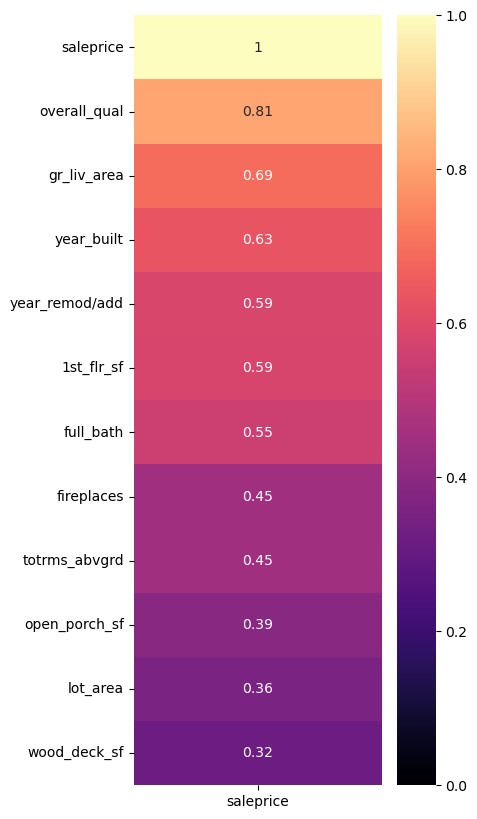

In [4]:
# visualizing correlation of featured columns as a heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(
    df.corr(numeric_only=True)[["saleprice"]].sort_values(
        by="saleprice", ascending=False
    ),
    vmin=0,
    vmax=1,
    annot=True,
    cmap="magma",
)
plt.savefig("../images/corr_heatmap.png", bbox_inches="tight")

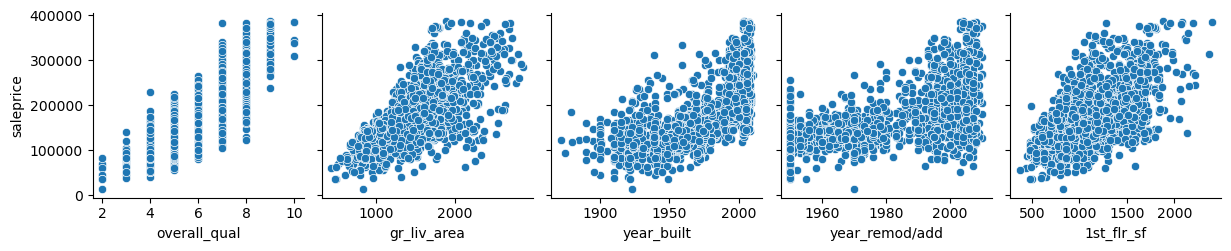

In [5]:

# visualizing correlations
sns.pairplot(
    df,
    x_vars=[
        "overall_qual",
        "gr_liv_area",
        "year_built",
        "year_remod/add",
        "1st_flr_sf",
    ],
    y_vars=["saleprice"],
)
plt.savefig('../images/corr_pairplot.png', bbox_inches = 'tight')

In [6]:
df['gr_liv_area'].describe()

count    1860.000000
mean     1436.926344
std       421.210818
min       438.000000
25%      1111.000000
50%      1407.500000
75%      1683.500000
max      2872.000000
Name: gr_liv_area, dtype: float64

In [7]:
df['1st_flr_sf'].describe()

count    1860.000000
mean     1116.274731
std       333.694065
min       372.000000
25%       866.000000
50%      1060.500000
75%      1337.000000
max      2392.000000
Name: 1st_flr_sf, dtype: float64

In [8]:
df['wood_deck_sf'].describe()

count    1860.000000
mean       84.019892
std       108.394753
min         0.000000
25%         0.000000
50%         0.000000
75%       159.250000
max       467.000000
Name: wood_deck_sf, dtype: float64

In [9]:
df['saleprice'].describe()

count      1860.000000
mean     171159.825269
std       63645.056275
min       12789.000000
25%      128000.000000
50%      157000.000000
75%      203000.000000
max      387000.000000
Name: saleprice, dtype: float64

In [10]:
df['fireplaces'].value_counts()[1:3].sum() / df['fireplaces'].value_counts().sum()

0.4801075268817204

In [11]:
# Choosing features and defining X and y
features = [
    "overall_qual",
    "gr_liv_area",
    "year_built",
    "1st_flr_sf",
    "year_remod/add",
    "full_bath",
    "fireplaces",
    "totrms_abvgrd",
    "open_porch_sf",
    "lot_area",
    "wood_deck_sf",
]
X = df[features]
y = df["saleprice"]

# Linear Regression

In [12]:
# perform train-test-split on df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# initiate a linear regression model and print out scores
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Cross Val Score: {cross_val_score(lr, X_train, y_train).mean()}")
print(f"Training Score: {lr.score(X_train, y_train):.4f}")
print(f"Testing Score: {lr.score(X_test, y_test):.4f}")

y_lr_pred = lr.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_lr_pred)}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_lr_pred))}")

Cross Val Score: 0.8450890591468381
Training Score: 0.8481
Testing Score: 0.8505
R2 Score: 0.8504828354731669
RMSE Score: 23893.921219226493


In [14]:
cols_coefs = list(zip(X.columns, lr.coef_))

cols_coefs_sorted = sorted(cols_coefs, key=lambda x: x[1], reverse=True)

cols, coefs = zip(*cols_coefs_sorted)

cols, coefs

(('overall_qual',
  'fireplaces',
  'year_built',
  'year_remod/add',
  'gr_liv_area',
  'open_porch_sf',
  'wood_deck_sf',
  '1st_flr_sf',
  'lot_area',
  'totrms_abvgrd',
  'full_bath'),
 (18065.685488213927,
  6860.615985100455,
  373.98862615124773,
  368.5552309058695,
  50.38590911089677,
  32.09166562876408,
  29.92930900696713,
  29.800644891982405,
  2.524357093993945,
  -2848.9612344420448,
  -7601.96136841142))

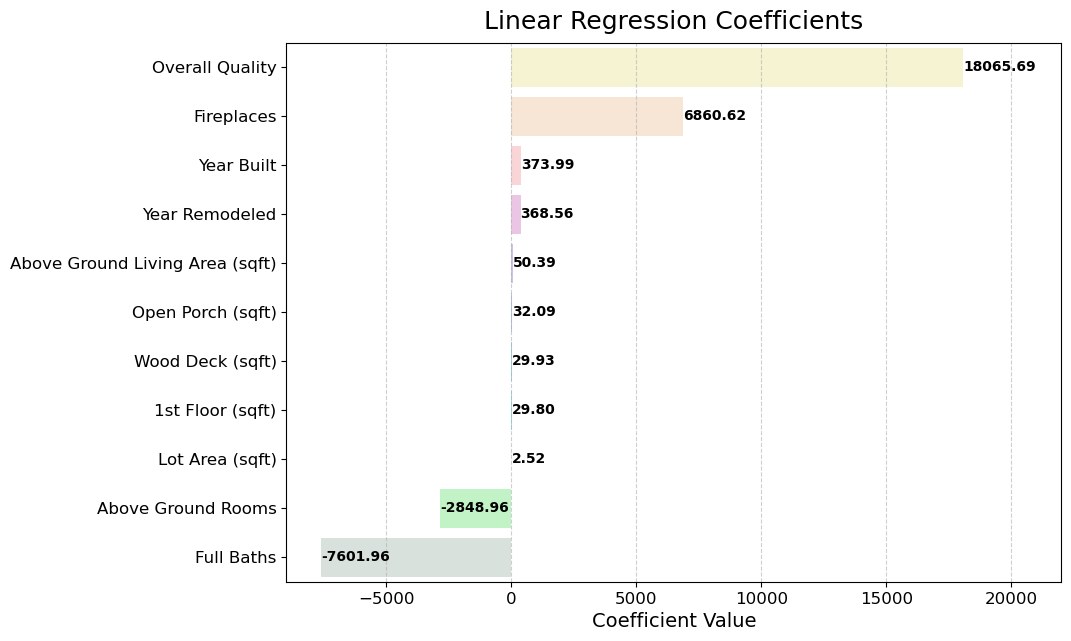

In [15]:
palette = [
    "#fbf8cc",
    "#fde4cf",
    "#ffcfd2",
    "#f1c0e8",
    "#cfbaf0",
    "#a3c4f3",
    "#90dbf4",
    "#8eecf5",
    "#98f5e1",
    "#b9fbc0",
    "#d8e2dc",
]


plt.figure(figsize=(10, 7))
sns.barplot(x=coefs, y=cols, palette=palette)
plt.title("Linear Regression Coefficients", size=18, pad=10)
plt.xlabel("Coefficient Value", size=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.xlim(-9000, 22000)
plt.yticks(
    [
        "overall_qual",
        "fireplaces",
        "year_built",
        "lot_area",
        "year_remod/add",
        "full_bath",
        "gr_liv_area",
        "1st_flr_sf",
        "open_porch_sf",
        "wood_deck_sf",
        "totrms_abvgrd",
    ],
    [
        "Overall Quality",
        "Fireplaces",
        "Year Built",
        "Lot Area (sqft)",
        "Year Remodeled",
        "Full Baths",
        "Above Ground Living Area (sqft)",
        "1st Floor (sqft)",
        "Open Porch (sqft)",
        "Wood Deck (sqft)",
        "Above Ground Rooms",
    ],
    fontsize=12,
)

# labels for bars. Got the idea from stackoverflow. link: https://stackoverflow.com/questions/43214978/how-to-display-custom-values-on-a-bar-plot
for i, o in enumerate(coefs):
    plt.text(o, i, f"{o:.2f}", color="black", va="center", fontweight="bold")

plt.savefig("../images/lr_coeffs.png", bbox_inches="tight")

In [16]:
# take predictions and export to csv file for kaggle competition
preds = lr.predict(kaggle_data[features])
kaggle_data["saleprice"] = preds
kaggle_data[["id", "saleprice"]].sort_values(by="id", ascending=True).to_csv(
    "../datasets/submissions/kaggle_lr_submission.csv", index=False
)

# Polynomial Regression

In [17]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

In [18]:
# perform train-test-split on the poly data
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [19]:
# fit to linear model
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# print out poly regression scores
print(f"Cross Val Score: {cross_val_score(lr, X_train, y_train).mean()}")
print(f"Training Score: {lr.score(X_train, y_train):.4f}")
print(f"Testing Score: {lr.score(X_test, y_test):.4f}")

y_poly_pred = lr.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_poly_pred)}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_poly_pred))}")

Cross Val Score: 0.876307920824751
Training Score: 0.8940
Testing Score: 0.8804
R2 Score: 0.880422287172383
RMSE Score: 21317.67085758631


In [21]:
cols_coefs = list(zip(X.columns, lr.coef_))

cols_coefs_sorted = sorted(cols_coefs, key=lambda x: x[1], reverse=True)

cols, coefs = zip(*cols_coefs_sorted)

cols, coefs

(('fireplaces',
  'totrms_abvgrd',
  'year_built',
  'lot_area',
  'wood_deck_sf',
  '1st_flr_sf',
  'gr_liv_area',
  'open_porch_sf',
  'year_remod/add',
  'overall_qual',
  'full_bath'),
 (196474.2692865514,
  44562.560691349514,
  6830.042914834291,
  29.36206802491943,
  -529.9580452373826,
  -769.9452481177403,
  -997.937324605178,
  -3835.265370978669,
  -22123.40727287304,
  -135166.4845674274,
  -138111.76824997042))

Even better model scores. High variance however starting to become overfit. I consider this model finished.
<br><br>

In [22]:
# take predictions and export to csv file for kaggle competition
kaggle_data_poly = poly.transform(kaggle_data[features])
preds = lr.predict(kaggle_data_poly)
kaggle_data["saleprice"] = preds
kaggle_data[["id", "saleprice"]].sort_values(by="id", ascending=True).to_csv(
    "../datasets/submissions/kaggle_poly_submission.csv", index=False
)

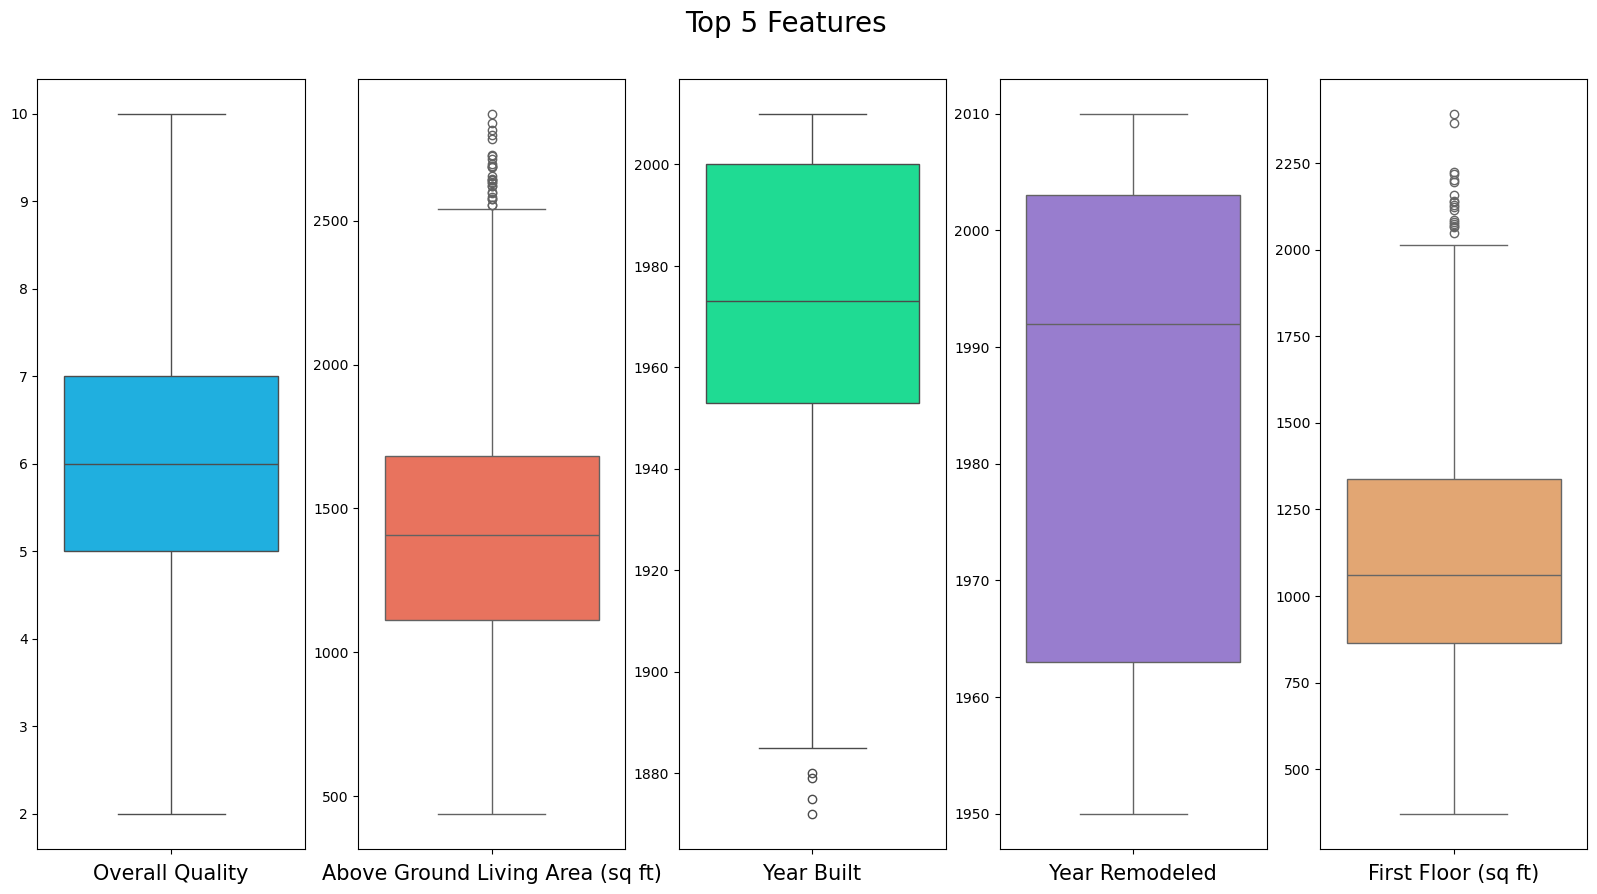

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
plt.title("Top 5 Features", size=20, x=-2, y=1.05)

# overall_qual
sns.boxplot(ax=axs[0], data=df, y=df["overall_qual"], color="deepskyblue")
axs[0].set_xlabel("Overall Quality", size=15)
axs[0].set_ylabel(None)

# gr_liv_area
sns.boxplot(ax=axs[1], data=df, y=df["gr_liv_area"], color="tomato")
axs[1].set_xlabel("Above Ground Living Area (sq ft)", size=15)
axs[1].set_ylabel(None)

# year_built
sns.boxplot(ax=axs[2], data=df, y=df["year_built"], color="mediumspringgreen")
axs[2].set_xlabel("Year Built", size=15)
axs[2].set_ylabel(None)

# year_remod/add
sns.boxplot(ax=axs[3], data=df, y=df["year_remod/add"], color="mediumpurple")
axs[3].set_xlabel("Year Remodeled", size=15)
axs[3].set_ylabel(None)

# 1st_flr_sf
sns.boxplot(ax=axs[4], data=df, y=df["1st_flr_sf"], color="sandybrown")
axs[4].set_xlabel("First Floor (sq ft)", size=15)
axs[4].set_ylabel(None)


plt.savefig("../images/boxplt2.png")

# Ridge and Lasso Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= .2, random_state= 42)

In [25]:
# scale data for ridge and lasso regression
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [26]:
# finding best alpha value and fitting
alphas = np.logspace(0, 5, 100)

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(Z_train, y_train);

In [27]:
# print out ridge scores
print(f"Cross Val Score: {cross_val_score(ridge_cv, Z_train, y_train).mean()}")
print(f"Training Score: {ridge_cv.score(Z_train, y_train):.4f}")
print(f"Testing Score: {ridge_cv.score(Z_test, y_test):.4f}")

y_ridge_pred = ridge_cv.predict(Z_test)

print(f"R2 Score: {r2_score(y_test, y_ridge_pred)}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_ridge_pred))}")

Cross Val Score: 0.8735558075237014
Training Score: 0.8847
Testing Score: 0.8809
R2 Score: 0.8808511896021721
RMSE Score: 21279.405305931432


In [28]:
Z_new_data = poly.transform(kaggle_data[features])
new_data_predictions = sc.transform(Z_new_data)
preds = ridge_cv.predict(new_data_predictions)
kaggle_data["saleprice"] = preds
kaggle_data[["id", "saleprice"]].sort_values(by="id", ascending=True).to_csv(
    "../datasets/submissions/kaggle_ridge_submission.csv", index=False
)

In [29]:
# finding best alpha value and fitting
l_alphas = np.logspace(-3, 0, 100)

lasso_cv = LassoCV(alphas=l_alphas)

lasso_cv.fit(Z_train, y_train);

In [30]:
# print out lasso scores
print(f"Cross Val Score: {cross_val_score(ridge_cv, Z_train, y_train).mean()}")
print(f"Training Score: {lasso_cv.score(Z_train, y_train):.4f}")
print(f"Testing Score: {lasso_cv.score(Z_test, y_test):.4f}")

y_lasso_pred = lasso_cv.predict(Z_test)

print(f"R2 Score: {r2_score(y_test, y_lasso_pred)}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_lasso_pred))}")

Cross Val Score: 0.8735558075237014
Training Score: 0.8865
Testing Score: 0.8821
R2 Score: 0.8821404041150436
RMSE Score: 21163.968433828304


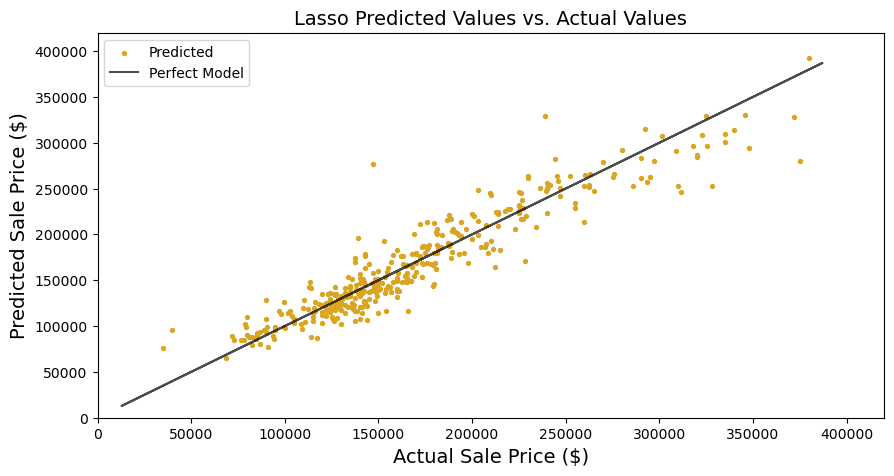

In [31]:
plt.figure(figsize=(10.15, 5))
plt.scatter(
    y_test,
    y_lasso_pred,
    color="goldenrod",
    s=8,
    label="Predicted",
)
plt.title("Lasso Predicted Values vs. Actual Values", size=14)
plt.xlabel("Actual Sale Price ($)", size=14)
plt.ylabel("Predicted Sale Price ($)", size=14)
plt.xlim(0, 420000)
plt.ylim(0, 420000)
plt.plot(df['saleprice'], y, color="black", alpha=0.7, label="Perfect Model")
plt.legend(loc="upper left")
plt.savefig("../images/lasso_y_ypred.png", bbox_inches="tight")

In [32]:
new_data = poly.transform(kaggle_data[features])
data_preds = sc.transform(new_data)
preds = lasso_cv.predict(data_preds)
kaggle_data["saleprice"] = preds
kaggle_data[["id", "saleprice"]].sort_values(by="id", ascending=True).to_csv(
    "../datasets/submissions/kaggle_lasso_submission.csv", index=False
)

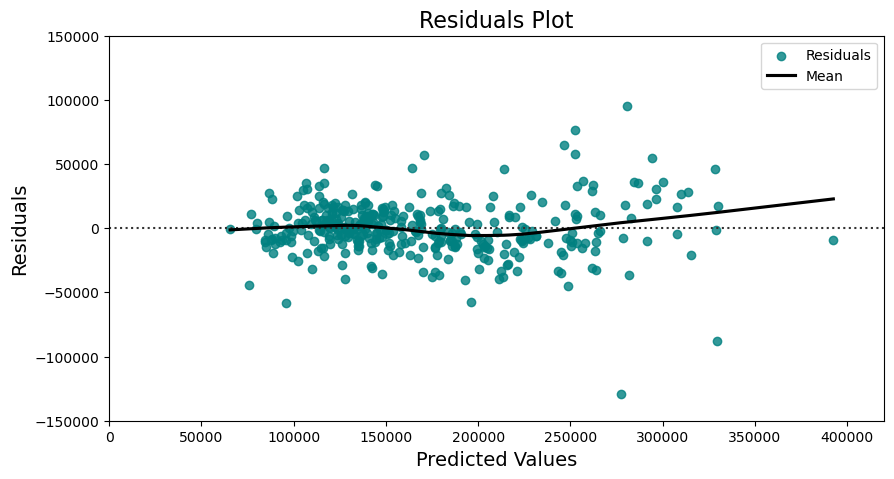

In [33]:
# plot of residuals
plt.figure(figsize=(10, 5))
sns.residplot(
    x=y_lasso_pred,
    y=y_test,
    lowess=True,
    color="teal",
    line_kws=dict(color="black", label="Mean"),
    label="Residuals",
)
plt.title("Residuals Plot", size=16)
plt.xlabel("Predicted Values", size=14)
plt.ylabel("Residuals", size=14)
plt.xlim(0, 420000)
plt.ylim(-150000, 150000)
plt.legend()
plt.savefig("../images/resid_lasso_ypred.png", bbox_inches="tight")

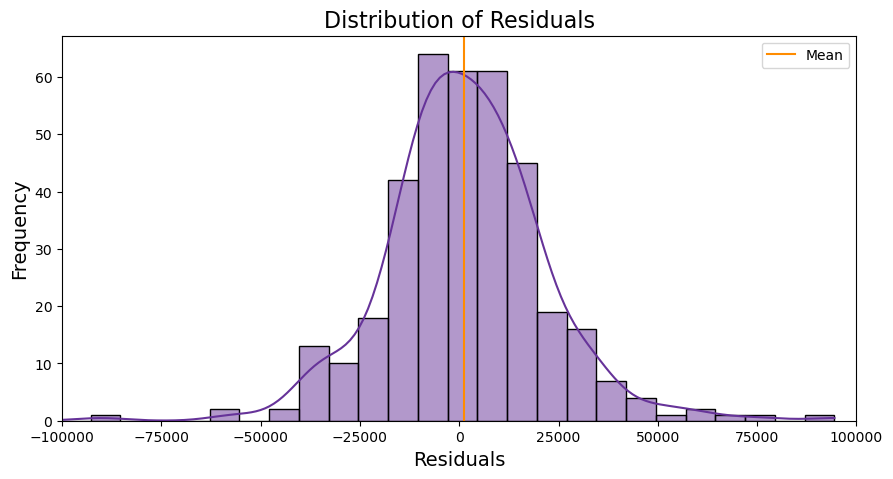

In [34]:
# distribution of residuals
plt.figure(figsize=(10.25, 5))
sns.histplot(y_test - y_lasso_pred, bins=30, kde=True, color="rebeccapurple")
plt.title("Distribution of Residuals", size=16)
plt.axvline((y_test - y_lasso_pred).mean(), color="darkorange", label="Mean")
plt.xlabel("Residuals", size=14)
plt.ylabel("Frequency", size=14)
plt.xlim(-100000, 100000)
plt.legend()
plt.savefig("../images/dist_resid_lasso_ypred.png", bbox_inches="tight")

In [35]:
(y_test - y_lasso_pred).mean()

1199.1454723024349